In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import timeit
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:


# Import relevant data
trainingData = pd.read_csv('gisette_train.data', delim_whitespace=True).values
trainingLabels = pd.read_csv('gisette_train.labels', delim_whitespace=True).values
testData = pd.read_csv(dataDir + 'gisette_valid.data', delim_whitespace=True).values
testLabels = pd.read_csv(dataDir + 'gisette_valid.labels', delim_whitespace=True).values


In [3]:
ns1 = [5, 10, 20, 50, 100]

In [4]:
##### Set up logistic regression
lReg = LogisticRegression(max_iter=250000)
start = timeit.default_timer()
lReg.fit(trainingData, trainingLabels.ravel())
stop = timeit.default_timer()
# Predict
predictions = lReg.predict(testData)

# Analyze score = logisticRegr.score(testData, testLabels)results
score = lReg.score(testData, testLabels)
print('Time: ', stop - start)  
print(score)

Time:  1.9542614970014256
0.9819819819819819


Using this method we get great accuracy but it takes a long time to train so it is now too efficent way.

In [5]:
res = []
tst = []

In [6]:
for n in ns1:
    pca = PCA(n_components=n)
    pca.fit(trainingData)    
    trainingDataN = pca.transform(trainingData)
    testDataN = pca.transform(testData)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = timeit.default_timer()
    logisticRegr.fit(trainingDataN, trainingLabels)
    predictions = logisticRegr.predict(testDataN)
    stop = timeit.default_timer()
    score = logisticRegr.score(testDataN, testLabels)
    tst.append(score)
    res.append(pca.explained_variance_ratio_.sum())
    
    print(n)
    print('Time: ', stop - start)
    print(score)

/home/ka4ka/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Time:  0.015393457000755006
0.8548548548548549
10
Time:  0.03438978800113546
0.9179179179179179
20
Time:  0.035598967999249
0.9379379379379379
50
Time:  0.02693614699819591
0.96996996996997
100
Time:  0.08242944999801693
0.9679679679679679


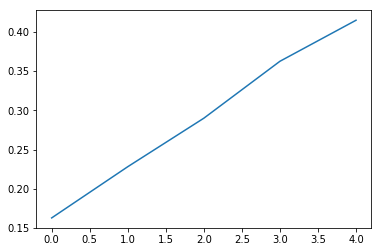

In [7]:
plt.plot(res)

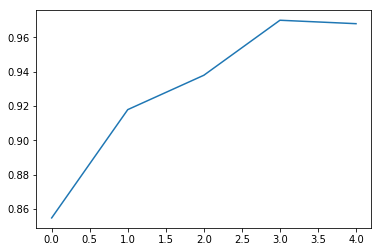

In [8]:
plt.plot(tst)


In [9]:
ns2 = [3, 5, 10, 20, 50]

/home/ka4ka/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Time:  0.008432006994553376
0.7407407407407407
5
Time:  0.009723131995997392
0.8578578578578578
10
Time:  0.015681477001635358
0.9179179179179179
20
Time:  0.016741702995204832
0.9459459459459459
50
Time:  0.026661420000891667
0.9769769769769769


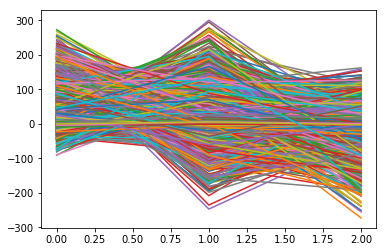

In [107]:
for n in ns2:
    fa = FactorAnalysis(n_components=n)
    fa.fit(trainingData)
    trainingDataN = fa.transform(trainingData)
    testDataN = fa.transform(testData)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = timeit.default_timer()
    logisticRegr.fit(trainingDataN, trainingLabels)
    predictions = logisticRegr.predict(testDataN)
    stop = timeit.default_timer()
    score = logisticRegr.score(testDataN, testLabels)
    if n == 3:
        plt.plot(fa.components_)
    print(n)
    print('Time: ', stop - start)
    print(score)

To better unerstand the difference before and after using PCA and Factor Analysis lets compare time and accuracy.

Linear regression:
Time:  2.2733754200016847
Score: 0.9819819819819819
We can see that we get a very good accuracy but it's taking a very long time.

After PCA with n=50
Time:  0.035665488001541235
Score: 0.970970970970971
We can see that we have a small loss in accuracy(around 0.01%) and at much faster speed(more than 7 times faster).

After Factor Analysis with n = 50
Time:  0.025794279001274845
Score: 0.9769769769769769
Even less accuracy loss and even faster training.

## HW6

You will need to
pip install mlxtend  

In [33]:
import numpy as np

from sklearn.model_selection import train_test_split

input_data = np.loadtxt('data/spambase.data', delimiter = ',', dtype = float)
np.random.shuffle(input_data)
X, target = input_data[:,:-1], input_data[:,-1]
#Splitting the train and test inputs/ targets
train_input, test_input, train_target, test_target = train_test_split(X, target, test_size = 0.50)

In [90]:
input_data.columns


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [12]:
lReg = LogisticRegression(max_iter=250000)
start = timeit.default_timer()
lReg.fit(train_input, train_target)
stop = timeit.default_timer()
# Predict
predictions = lReg.predict(test_input)

# Analyze score = logisticRegr.score(testData, testLabels)results
score = lReg.score(test_input, test_target)
print('Time: ', stop - start)  
print(score)

Time:  0.025815861001319718
0.9282920469361148


In [34]:
knn = KNeighborsClassifier(n_neighbors=4)

In [50]:
sfs = SFS(knn, 
          k_features=(1, train_input.shape[1]), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
start = timeit.default_timer()
sfs = sfs.fit(train_input, train_target)
stop = timeit.default_timer()

In [51]:
print('\nSequential Forward Selection (k=3):')
print('Time: ', stop - start)
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
Time:  57.25042281399874
(3, 5, 6, 7, 12, 15, 16, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53)
CV Score:
0.9265217391304348


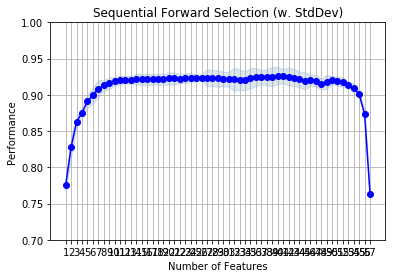

In [52]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [17]:
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=3,
          n_jobs=-1)
sbs = sbs.fit(train_input, train_target)

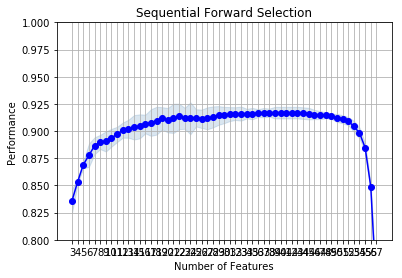

In [18]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [19]:
print('\nSequential Backward Selection (k=3):')
print('Time: ', stop - start)
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=3):
Time:  2.3397128229989903
(24, 51, 54)
CV Score:
0.836085003341719


We got different subsets and it's normal since Backward and Forward selections doesn't always same subset.

In [58]:
# clf = DecisionTreeClassifier(random_state=0)
# dtree = dtree.fit(train_input, train_target)

array([0.92207792, 0.88311688, 0.92173913, 0.9173913 , 0.88695652,
       0.9       , 0.90869565, 0.92608696, 0.89082969, 0.87772926])

In [93]:
train = pd.DataFrame(train_input)
target = pd.DataFrame(train_target)

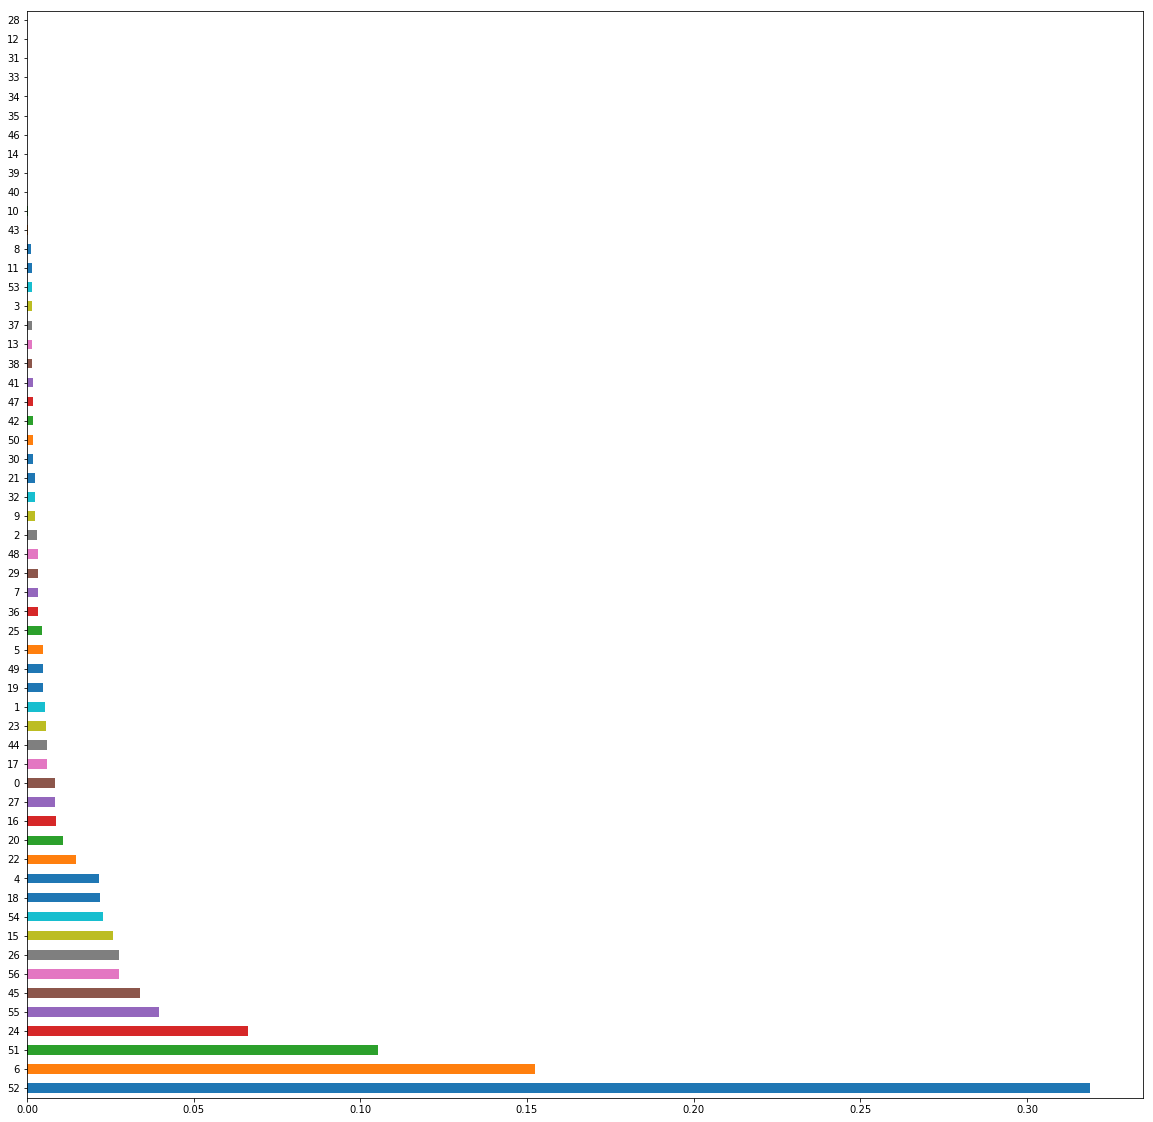

In [105]:
tree = DecisionTreeClassifier().fit(train, target)
feat_importances = pd.Series(tree.feature_importances_, index=train.columns)
feat_importances.nlargest(len(train.columns)).plot(kind='barh', figsize=(20, 20))

Let's compare time and accuracy of different models.
Logistic regression. We can see that we get better accuracy to time ratio if we use Logistic Regression.